In [40]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [83]:
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*-fold0.csv'
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
#     print(all_files)
    for filename in all_files:
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            kernel_substring_location = filename.find('kernel')
            kernel_number = filename[kernel_substring_location - 2:kernel_substring_location]
            if not kernel_number.isnumeric:
                kernel_number = kernel_number[1:len(kernel_number)]
            ksize = int(kernel_number)
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    print(len(kernel_sizes), len(accuracy_values))
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
    print(kernel_sizes, accuracy_values)
    return kernel_sizes, accuracy_values

In [84]:
layers0 = '4cnn'
max_length0 = '40mlength'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)

9 9
(2, 3, 4, 5, 6, 7, 8, 9, 10) (0.9672392753215056, 0.960949967145405, 0.9586501454989204, 0.9640476860978128, 0.9604806157889796, 0.9638599455552428, 0.961982540129541, 0.9611377076879752, 0.9605275509246222)


In [85]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)

9 9
(2, 3, 4, 5, 6, 7, 8, 9, 10) (0.9675208861353608, 0.9651271942175912, 0.965174129353234, 0.96658218342251, 0.964141556369098, 0.9609030320097623, 0.9650333239463064, 0.9627335022998216, 0.9628273725711068)


In [86]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)

9 9
(2, 3, 4, 5, 6, 7, 8, 9, 10) (0.9672862104571482, 0.9666291185581526, 0.9651271942175912, 0.9637660752839576, 0.9639068806908851, 0.9595419130761288, 0.9617478644513284, 0.9636722050126724, 0.9646109077255234)


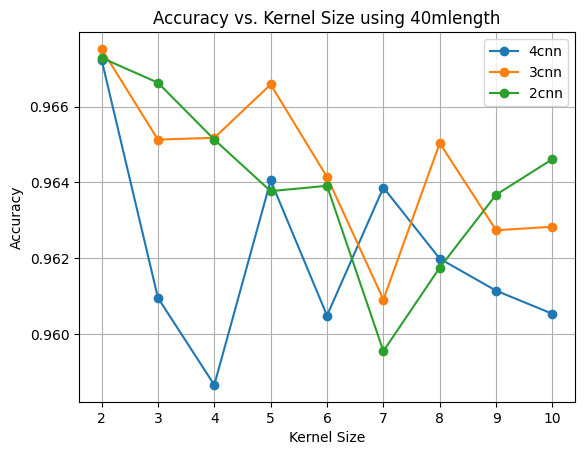

In [87]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Size using {0}'.format(max_length0))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.show()